# **LIWC VISUALIZATION**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define the data columns types
dtypes = {
    'anx': float,
    'anger': float,
    'sad': float,
    'posemo': float,
    'negemo': float,
    'health': float,
    'stress': float
}

## Separate periods

Se can upload the separate files to create the histograms for each period.

In [ ]:
#Set path for files
files_path        = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/4.LIWC_Analysis/Results/'

In [ ]:
wildfire_Tubbs     = 'TubssFire'

In [ ]:
output_Tubbs       = 'LIWC2015_Resutls_TubbsFire.csv'

In [ ]:
output_Tubbs_stress = 'LIWC2015_TibbsFire_Stress.csv'

In [ ]:
#print the name of files in the directory

# Set the directory path
directory = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/4.LIWC_Analysis/Results/'

# Extract the names of files in the directory
file_names = os.listdir(directory)

# Print the file names
print(file_names)

['LIWC2015_TibbsFire_Stress.csv', 'LIWC2015_Resutls_TubbsFire.csv']


In [ ]:
# Read the CSV file and replace the comma with a period
df_Tubbs         = pd.read_csv(os.path.join(files_path, output_Tubbs)).replace(',', '.', regex=True)
df_Tubbs_stress  = pd.read_csv(os.path.join(files_path, output_Tubbs_stress)).replace(',', '.', regex=True)

print(df_Tubbs.shape)
print(df_Tubbs_stress.shape)

(90759, 95)
(90759, 3)


In [ ]:
df_Tubbs        = df_Tubbs.drop(0)

In [ ]:
df_Tubbs_stress  = df_Tubbs_stress[['A','B','stress']]

# Convert 'A' column to numeric type in df_Tubbs
df_Tubbs['A']        = pd.to_numeric(df_Tubbs['A'], errors='coerce')
df_Tubbs_stress['A'] = pd.to_numeric(df_Tubbs_stress['A'], errors='coerce')

Tubbs            = df_Tubbs.merge(df_Tubbs_stress, on='A', how='left')
print(Tubbs.shape)

In [ ]:
category_cols  = ['anx', 'anger', 'sad','stress', 'posemo', 'negemo','health']
filtered_Tubbs = Tubbs[category_cols]

# Convert the specified columns to the desired data types
filtered_Tubbs     = filtered_Tubbs.astype(dtypes)

## **Figure 1. Proportion of tweets in each category by period**

In [ ]:
total_tweets_df1 = len(filtered_Tubbs)
proportions_df1  = 100*filtered_Tubbs[category_cols].astype(bool).sum()/total_tweets_df1

print(proportions_df1)

anx        5.899009
anger     15.327068
sad       12.925155
stress    36.277696
posemo    23.132182
negemo    42.989830
health     7.921905
dtype: float64


In [ ]:
filtered_Tubbs.shape

(90761, 7)

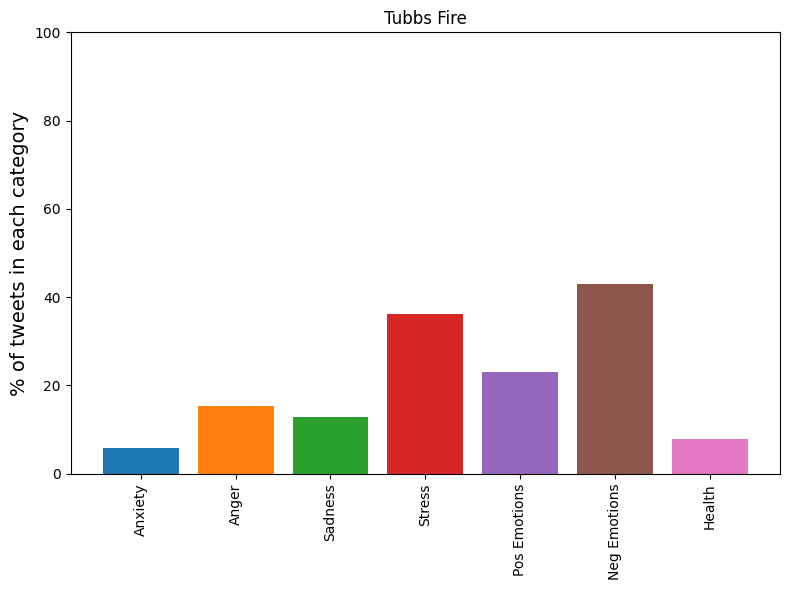

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# New column names
#['anx', 'anger', 'sad','stress', 'posemo', 'negemo','health']
new_category_cols = ['Anxiety', 'Anger', 'Sadness', 'Stress', 'Pos Emotions', 'Neg Emotions', 'Health']


# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for DataFrame 1
ax.bar(new_category_cols, proportions_df1, color=colors)
ax.set_title('Tubbs Fire')
ax.set_ylim(0, 100)
ax.tick_params(axis='x', rotation=90)

# Set y-axis label
ax.set_ylabel('% of tweets in each category',fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


##save figures
figure_path = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Figures/'
figure_name = 'LIWC_prop_tweets_per_category.pdf'


# Save the figure as a PDF
output_file = os.path.join(figure_path,figure_name)

# Save the figure with high quality and 350 px width
fig.savefig(output_file, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()